<a href="https://colab.research.google.com/github/makhmudovamunira/DataScience_Mohirdev/blob/main/Underhood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARNING NEGIZIDA NIMA TURUBDI?

#### Kutubxonalarni o'rnatib olamiz

Bizga kerak bo'ladi:

 - `fastai==2.5.3` versiyasi
 - `torch==1.10.0+cu111` versiyasi

Eslatma: Kurs yozilgan vaqtda yuqoridagi versiyalardan foydalanilgan.

In [ ]:
!pip install fastai

In [ ]:
!pip install torch

In [ ]:
import fastai
import torch

print(fastai.__version__)
print(torch.__version__)

## `3` yoki `7`

### O'sha mashhur MNIST dataseti haqida:
Bu darsimizda, `computer vision` sohasidagi mashhur datasetlarda biri [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dan foydalanamiz. Bu dataset qo'lda yozilgan raqamlar jamlamasidan iborat dataset hisoblanadi. Bu ma'lumotlar to'plami National Institute of Standarts and Technology tomonidan jamlangan va Machine Learning sohasiga Yann Lecun va uning jamoasi tomonidan qo'llanilgan.  

Ma'lumot: Barcha rasmlar `28` x `28` o'lchamdagi piksellardan iborat.

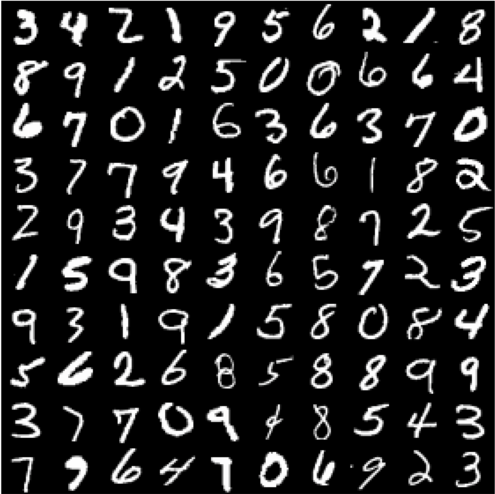

MNIST datasetidagi faqat 3 va 7 sonlarini ajratib olingan datasetni yuklab olamiz.

In [ ]:
from fastai.vision.all import *

#path
path=untar_data(URLs.MNIST_SAMPLE)

threes=(path/'train'/'3').ls().sorted()
sevens=(path/'train'/'7').ls().sorted()

In [ ]:
im3_sample=threes[5]
im3=Image.open(im3_sample)
im3

In [ ]:
im7_sample=sevens[2]
im7=Image.open(im7_sample)
im7

### Rasmdagi raqamlar bizga rasm bo'lib ko'ringani bilan, kompyuterlarda inosnlar kabi ko'rish qobilyati mavjud emas. Qiziq, kompyuterlar bu raqamlarni qanday ko'rinishda ko'rar ekan? Javob: Kompyuterlar, rasmlarni raqamlar iborat to'plam sifatida ko'radi. Bunda har bir raqam mahsus rangni ifodalab keladi.

In [ ]:
array(im3)[4:10, 4:10]

In [ ]:
tensor(im3)[4:10, 4:10]

In [ ]:
import pandas as pd
im3_t=tensor(im3)
df=pd.DataFrame(im3_t[4:22, 4:22])
df.style.set_properties(**{'font-size':'7pt'}).background_gradient('Greys')

In [ ]:
import pandas as pd
im7_t=tensor(im7)
df=pd.DataFrame(im7_t[4:28, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

### Piksellar o'xshashligi

### Bu masalani, piksellar o'xshashligi orqali yechib ko'rish mumkin. Ya'ni, barcha 3 ga tegishli rasmlardan foydalanib o'rtacha holatda 3 (ideal "3" deb ataylik) raqami qanday bo'lishi topilib undan keyin berilgan ma'lumotlarimizni ideal "3" raqamiga solishtirib 3 yoki 3 emasligini bashorat qilish mumkin. Huddi shu jarayon 7 uchun ham takrorlanadi.

In [ ]:
#Rasmlarni tensorlar ko'rinishiga keltirib,  ketin listga joylab chiqamiz
three_tensors=[tensor(Image.open(i)) for i in threes]
seven_tensors=[tensor(Image.open(i)) for i in sevens]
len(three_tensors), len(seven_tensors)

In [ ]:
show_image(three_tensors[2])

### Stacking
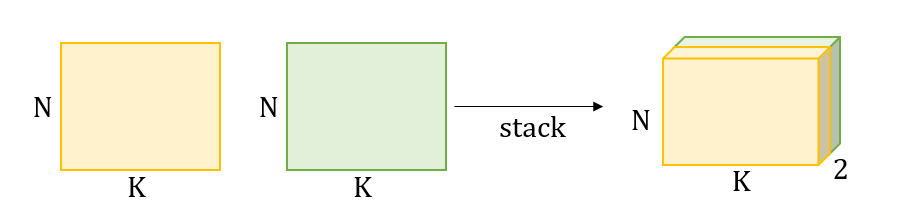

In [ ]:
stacked_threes=torch.stack(three_tensors).float()/255
stacked_sevens=torch.stack(seven_tensors).float()/255
stacked_sevens.shape

In [ ]:
mean3=stacked_threes.mean(0)
show_image(mean3)

In [ ]:
mean7=stacked_sevens.mean(0)
show_image(mean7)

### Xatoliklarni o'lchash

- Mean absolute difference(error) `MAE` yoki `L1 norm`
- Root Mean Squared Error `RMSE` yoki `L2 norm`

In [ ]:
s_3=stacked_threes[2]
show_image(s_3)

In [ ]:
""" MAE va RMSE yordamida s_3 sample bilan ideal "3" orasidagi xatolik """

#MEA
mea=(s_3-mean3).abs().mean()

#RMSE
rmse=((s_3-mean3)**2).mean().sqrt()

mea, rmse

In [ ]:
""" MAE va RMSE yordamida s_3 sample bilan ideal "7" orasidagi xatolik """

#MEA
mea=(s_3-mean7).abs().mean()

#RMSE
rmse=((s_3-mean7)**2).mean().sqrt()

mea, rmse

### NumPy Array va PyTorch Tensorlar haqida qisqacha


#### NumPy ilm fanda va raqamli hisoblashlarda juda ham keng qo'llaniladigan kutubxonalardan biri hisoblanadi. NumPydagi arraylar ham PyTorch tensorlari bilan deyarli bir xil, faqatgina PyTorch GPU qurilmasida tensorlar yordamida hisoblash va gradientlarni avtomatik hisoblash imkoniyatlari bilan Deep Learning sohasida Numpy arraydan ustun turadi.

- Eslatma: fastai kutubxonasi, numpy arrayni hamda torch tensorlarni `array()` va `tensor()` orqali chaqirish imkoniyatini beradi.

### list, array, tensor

In [ ]:
from fastai.vision.all import *

data=[[1,2,3], [4,5,6]]
arr=array(data)
tns=tensor(data)

In [ ]:
data

In [ ]:
arr

In [ ]:
tns

### Modelni aniqligini broadcasting orqali aniqlash

In [ ]:
valid_3_tensor=torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'3').ls()])
valid_3_tensor=valid_3_tensor.float()/255

valid_7_tensor=torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'7').ls()])
valid_7_tensor=valid_7_tensor.float()/255

valid_3_tensor.shape, valid_7_tensor.shape, mean3.shape

### MAE ni hisoblashni funksiyaga aylantiramiz

In [ ]:
#mea xatolik funksiyasi

def mea(a,b):
  return (a-b).abs().mean((-1,-2))

#tekshirish
mea(s_3, mean3)

valid_3_error=mea(valid_3_tensor, mean3)
valid_7_error=mea(valid_7_tensor, mean7)

valid_3_error.shape, valid_7_error.shape

### Broadcasting
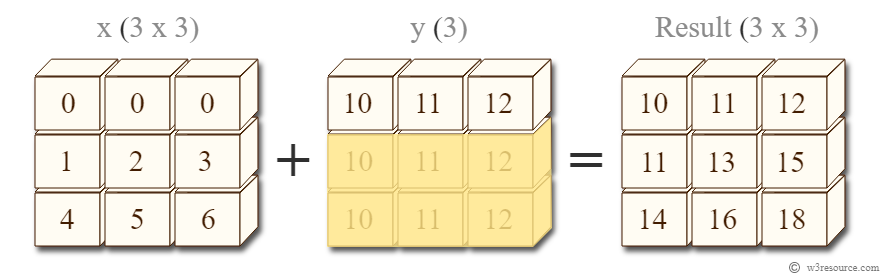

### Natijalovchi funksiya

In [ ]:
def is_3(x):
  return mea(x, mean3)<mea(x, mean7)

def is_7(x):
  return mea(x, mean7)<mea(x, mean3)

is_3(s_3), is_3(s_3).float()

In [ ]:
accuracy3=is_3(valid_3_tensor).float().mean()
accuracy7=is_7(valid_7_tensor).float().mean()

accuracy3, accuracy7, (accuracy3+accuracy7)/2

# Gradient Descent

`3` va `7` raqamlarini klassifikatsiya qilishni, hech qanday machine learning ishtirokisiz amalga oshirib ko'rdik. Lekin biz qurgan dastur hech qanday o'rganish qobilyatiga emas, shunchaki ideal `3` yoki `7` ga solishtirilib natija qaytaradigan dastur xolos.


***Endi shu masalani qanday qilib machine learning muommosiga aylantiramiz?***

Buning javobini siz allaqchon bilasiz:
1-qismdagi darslarimizni eslang, u yerda vazn qo'llanilishi(`weight assignment`) haqida gapirgan edik. Aynan shu vazn qo'llab biz dasturimizni ishlash ko'rsatgichiga ta'sir o'tkazishimiz mumkin edi. Lekin ta'sirni qay darajada o'tkizishni (vaznni qay darajada kattaroq yoki kichikroq qo'llashni nazarda tutayapmiz) esa moshinaning tajribasidan kelib chiqib qo'llar edik.

**`Xoh ishoning xoh ishonmang, yuqorida aytganlarimiz machine learning muommolarini yechishda asosiy tamoyil hisoblanadi.`**

### `3` va `7` raqamlarini machine learning klassifikatoriga aylantirish uchun quyidagi qadamlar zarur bo'ladi:

(1) Boshlang'ich vaznlarni(weights) yaratib olish

(2) Har bir rasm uchun, 1-qadamda yaratib olingan vaznlardan foydalanib `3` yoki `7` ekanligini boshorat qilish

(3) 2-qadamdan olingan bashorat yordamida modelni qay darajada yaxshi ishlayotganligini  (`loss`ni) hisoblash demakdir

(4) `Gradientni` hisoblash, bu hisoblash har bir vazn qiymatining o'zgarishi `loss`ning qiymatiga ta'sirini o'lchash imkoniyatini beradi

(5) `Step` orqali, 4-qadamda hisoblangan o'zgarish qiymatiga ko'ra vaznlarni qiymatini yangilaymiz

(6) 2-qadamga qaytib, yana shu jarayonni bir necha marotaba qaytaramiz

(7) Yuqoridagi jarayonlarni, vaznlarimiz optimal qiymatlarni topmaguncha qaytaraverish (yoki trainingni kerakli aniqlikga yetgach to'xtatish)

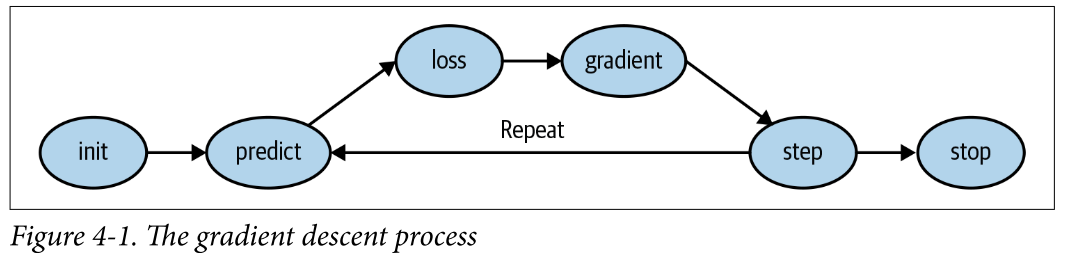

### Boshlang'ich vaznlarni(weights) yaratib olish

Bu qadamda shunchaki vazn qiymatlarni taxminiy `random` qiymatlar orqali yaratib olishimiz mumkin

###  Har bir rasm uchun bashorat

Bashoratni eng oddiy chiziqli tenglama yordamida amalga oshiramiz:

### `y=wx+b`

bu yerda:
- `w` vazn
- `x` rasmlardagi piksellar
- `b` bias

###  `Loss`ni hisoblash

Loss bu xatolikni o'lchash mezoni.  bo'lib, uning qiymati orqali biz modelimiz qay darajada yaxshi o'qitilayotganini aniqlashimiz mumkin bo'ladi

### Step

Shunchaki `gradient`dan aniqlangan natijaga ko'ra vazn `w`larning qiymatlarini ortirish yoki kamaytirishni dastlab aniqlab olib, undan so'ng qiymatlarni sekin astalik bilan o'zgartiradi.

### Stop

Bu o'qitish jarayonini bizning istaklarimizga ko'ra to'xtatish jarayoni hisoblanadi.

## Bu tushunchalarni to'g'ridan to'g'ri rasmlarni klassifikatoriga qo'llashdan avval, dastlab ular o'zi nima ekanliklarini tahlil qilib ko'raylik

Tassavur qiling bizni loss funkisyamizning ko'rinish taxminan mana shu funkiya ko'rinishida, `w` bu yerda funksiyaning vazn paramteri faraz qiling

In [ ]:
def loss(w):
  return w**2

In [ ]:
import matplotlib.pyplot as plt

#@title plotting function
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
  x=torch.linspace(min, max,100)
  fig, ax= plt.subplots(figsize=figsize)
  ax.plot(x, f(x))
  if tx is not None:ax.set_xlabel(tx)
  if ty is not None:ax.set_ylabel(ty)
  if title is not None: ax.set_title(title)


grafik ko'rinishi quyidagicha

In [ ]:
plot_function(loss, 'w', 'loss', min=-5, max=5)

In [ ]:
plot_function(loss, 'w', 'loss', min=-5, max=5)
plt.scatter(-3, loss(-3), color='red')

Maqsadimiz lossning qiymatini minimalga tushirish, va o'sha minimalga tushgan holatdagi `w`ning qiymati, biz uchun optimal parameter vazifasini o'taydi. Mana shu qiymatni avtomatik hisoblab topish uchun, biz `gradient`ni hisoblay olishimiz kerak.

In [ ]:
#@title tangent Line of Parobala {display-mode='both'}
def parobala_tangent_liner(w):
  #Calculating parobala (qudratic)
  def loss(w):
    return w**2

  #slope of the parabola
  def slope(w):
    return w*2

  #range for plotting parabola
  w_range=np.linspace(-5,5,100)

  w=w # assign user defined value
  loss_v = loss(w) # get the value for the user-defined point

  # tangent line according to # y = slope*(x - x1) + y1
  def line(w_range, w, loss_v):
    return slope(w)*(w_range-w)+loss_v

  # range for plotting line
  line_range = np.linspace(w-1, w+1, 20)

  # plotting
  plt.plot(w_range, loss(w_range), color='blue')
  plt.scatter(w, loss_v, color='r', s=50)
  plt.plot(line_range, line(line_range, w, loss_v), 'r--')
  plt.xlabel('w')
  plt.ylabel('loss')

In [ ]:
parobala_tangent_liner(4)

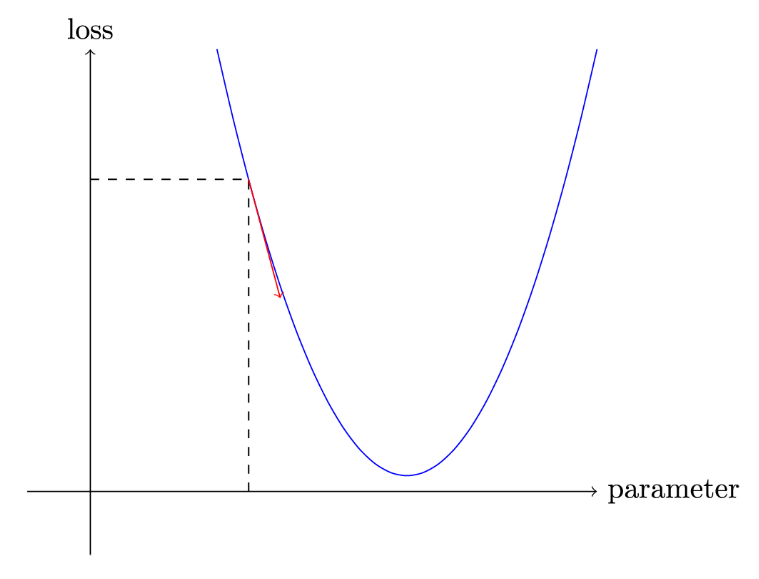

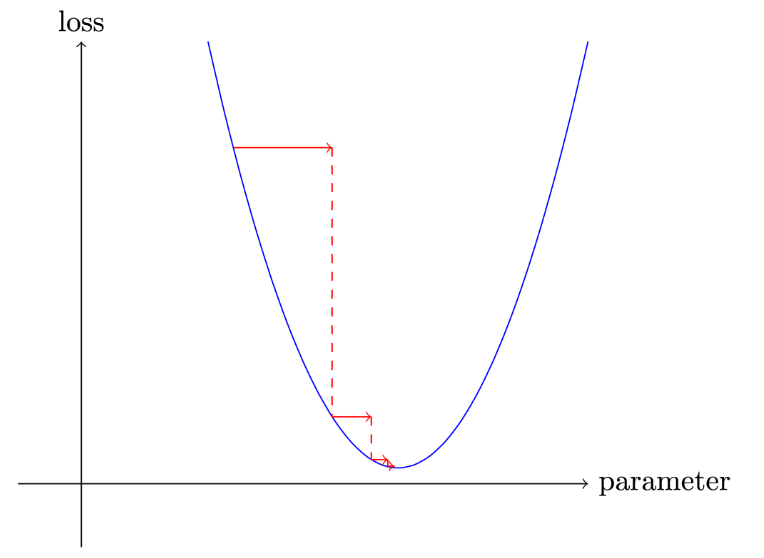

## Gradientni hisoblash

In [ ]:
w_t=torch.tensor(3., requires_grad=True)
w_t

In [ ]:
loss_v=loss(w_t)
loss_v

In [ ]:
loss_v.backward()

### Loss funksiya : `w**2` qonuniyatiga bo'ysunadi, bu funksiyaning hosilasi `2*w` bo'ladi.

In [ ]:
w_t.grad

# Step with learning rate

Parameterlar(vaznlar)ni gradient qiymatlariga ko'ra o'zgaritirish deep learning jarayonining asosiy qismlaridan biri hisoblanadi. Bu qadamda, deyarli barcha usullar bir xil bo'ladi, ya'ni gradient qiymati kichik bo'lgan raqamlar(`lr`)ga ko'paytirilib, undan so'ng parameter(vazn) qiymati ortirilib yoki kamaytirilib qo'yiladi (quyida formulalar keltirilgan).

lr - Learning Rate (O'rganish qadami). Odatda juda kichik sonlardan iborat `0.001 dan 0.1` oralig'ida

## `w = w+lr*w.grad` yoki `w = w-lr*w.grad`

## Python dasturlash tilida: `w += lr*w.grad` yoki `w -= lr*w.grad`

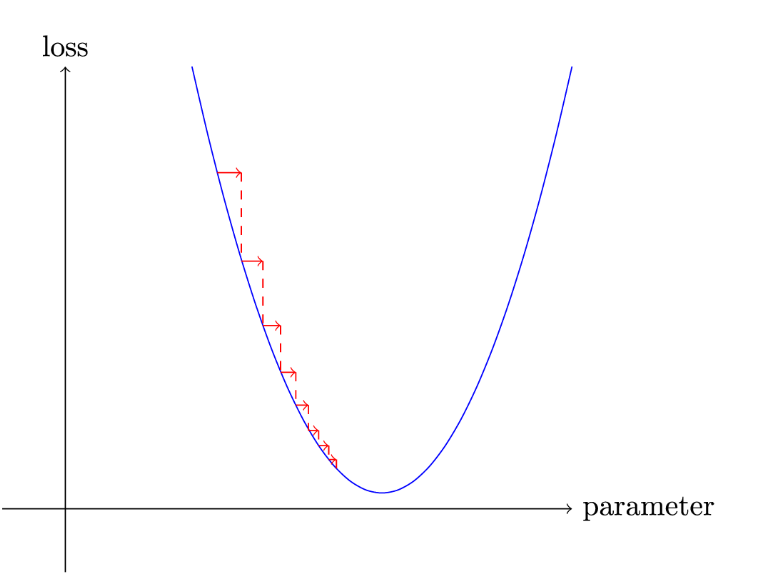

### Learning rate juda katta qo'llanilganda

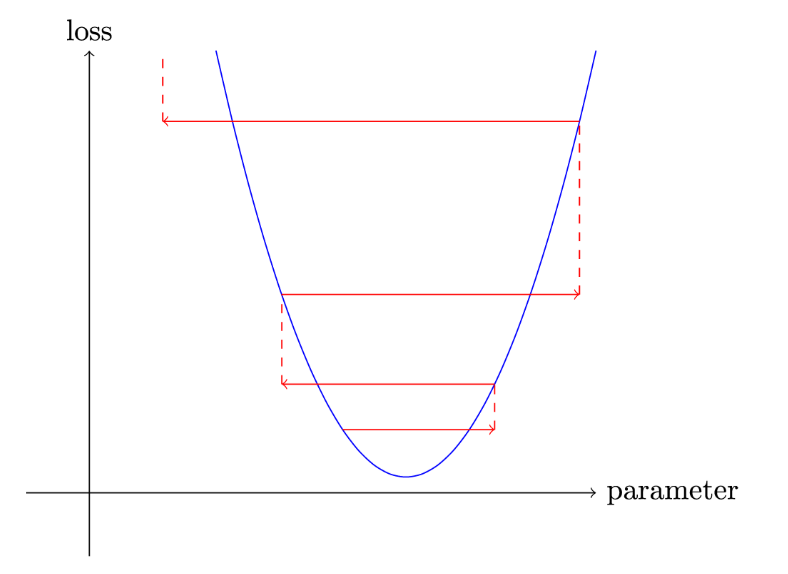

# Stochastic Gradient Descent uchun (to'liq misol) - End-to-End SGD Example

## Yuqoridagi misolda, qanday qilib **Gradient Descent** orqali `loss` qiymatini minimallashtirish mumkinligini ko'rib chiqdik. Navbat, qanday qilib `loss`ni minimallashtirish orqali modelimizni yaxshiroq o'rganishiga misol keltirishga yetib keldi. Bu misol `Stochastic Gradient Descent (SGD)`ga asoslangan bo'ladi. Stochastic Gradient Descent ham Gradient Descentning bir ko'rinishi bo'lib, bu haqida batafsilroq misolimizdan keyin muhokama qilamiz.


Eslatma: Bu misol, yuqorida o'tganlarimiz, 7 ta qadam asosida bo'ladi.
______________

## Misolimiz Roller Coaster attraksionini tepalikga chiqib tushgandagi tezligini o'lchash haqida bo'ladi.

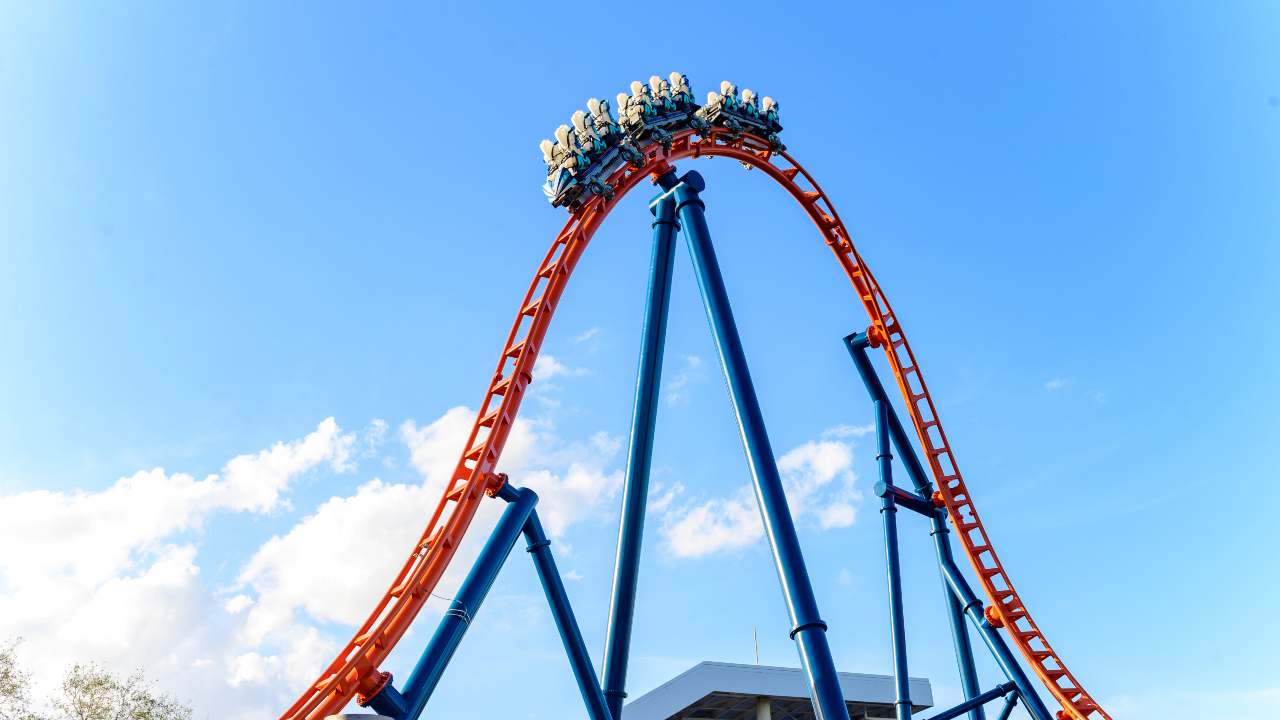

In [ ]:
time=torch.arange(0,20).float()
time

In [ ]:
speed=torch.randn(20)*3+0.75*(time-9.5)**2+1

# plotting
plt.scatter(time, speed,)
plt.xlabel('time')
plt.ylabel('speed')
plt.title('Roller Coaster Tezligi')

### Mana shu tezliklar uchun, SGD yordamida model o'qitib ko'ramiz. Barcha funksiyalarni hisobga olish imkoniyatimiz mavjud bo'lmaganligi uchun, dastlab ma'lumotlarimizni qanday funksiya yordamida moslashtirish(fit) mumkinligini taxmin qilib olaylik. Ma'lumotlar tuzulishidan ko'proq kvadratik tenglamaga bo'ysinuvchi ko'rinishni eslatayabdi shunday emasmi. Kvadratik tenglamaning matematik ifodasi $y=a*x^2+b*x+c$, holatimizga moslashtiradigan bo'lsak unda $speed=a*time^2+b*time+c$. Demak shu tenglamadan foydalanib `a`, `b` va `c`larning optimal qiymatlarini topib modelimizni ma'lumotlarimizga moslasak bo'lar ekan.

kvadratik funksiya yaratuvchi

In [ ]:
def f(t, params):
  a,b,c=params
  return a*(time**2)+time*b+c

Lossni hisoblash funskiyasi: MSE (Mean Sqaured Error)

In [ ]:
#loss function
def mse(preds, targets):
  return ((preds-targets)**2).mean()

### 7 ta qadamlarni ketma ket bajaramiz:

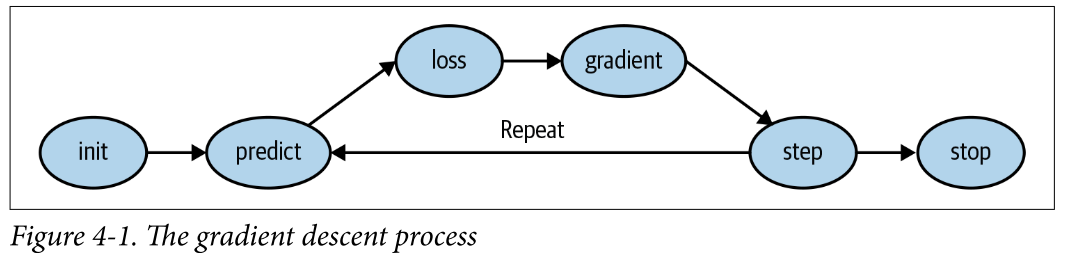

### 1. Initialize (Vaznlarni boshlang'ich qiymatini yaratib olish)

In [ ]:
params=torch.randn(3).requires_grad_()
params

### 2. Prediction (Bashorat)

In [ ]:
preds=f(time,params)

In [ ]:
#@title show_preds()
def show_preds(preds, ax=None):
  if ax is None:ax=plt.subplots()[1]
  ax.scatter(time, speed, label='data')
  ax.scatter(time, to_np(preds),color='red', label='predicted_data')
  ax.set_ylim(-300,100)
  ax.set_xlabel(time)
  ax.set_ylabel(speed)
  ax.legend()

In [ ]:
show_preds(preds)

### 3. Lossni hisoblash

In [ ]:
loss=mse(preds, speed)
loss

### 4. Gradientni hisoblash

In [ ]:
loss.backward()
params.grad

### 5. Step

In [ ]:
lr=1e-5
params.data-=lr*params.grad.data
params.grad=None

### 6. 2-qadamga qaytib yana boshoratni amalga oshirish

In [ ]:
preds = f(time, params)
# yangi olingan bashorat uchun xatolikni hisoblash
mse(preds, speed)

In [ ]:
show_preds(preds)

In [ ]:
def apply_step(param, prn=True):
  preds=f(time, params)
  loss=mse(preds, speed)
  loss.backward()
  params.data-=lr*params.grad.data
  params.grad=None
  if prn:print(loss.item())
  return preds

### 7. Istalgan epochgacha modelni o'qitish

In [ ]:
for epoch in range(10):
  apply_step(params)

In [ ]:
_, axs=plt.subplots(1,4, figsize=(14,3))
for ax in axs:
  show_preds(apply_step(params, prn=False), ax)
plt.tight_layout()

# Gradient Descent(GD), Stochastic Gradient Descent(SGD), Mini-batch

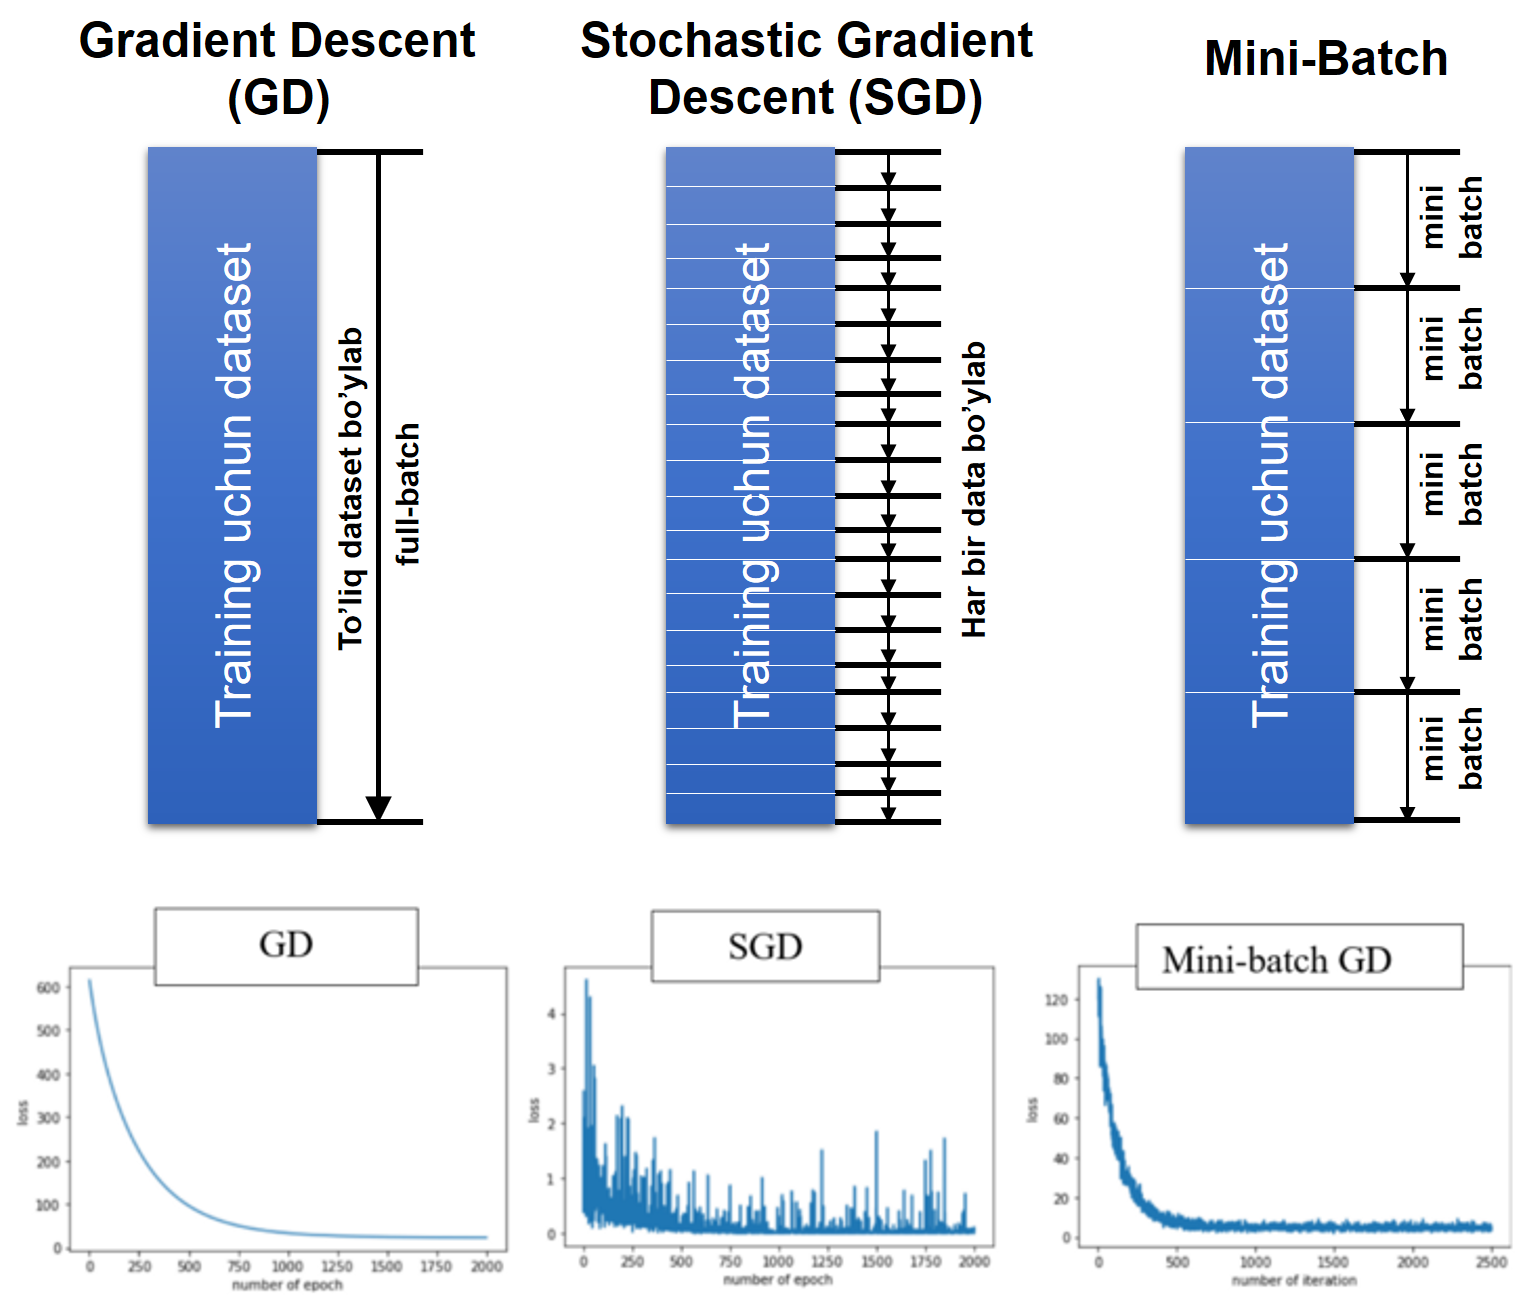

___
# MNIST (`3` yoki `7`)

### Ma'lumotlarni vector tensor ko'rinishiga keltirib olish

### Concatinating
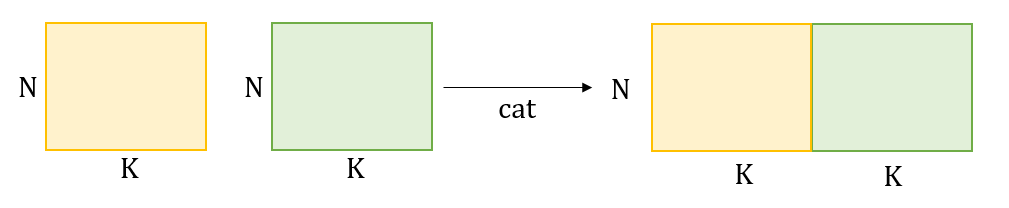

### Reshaping
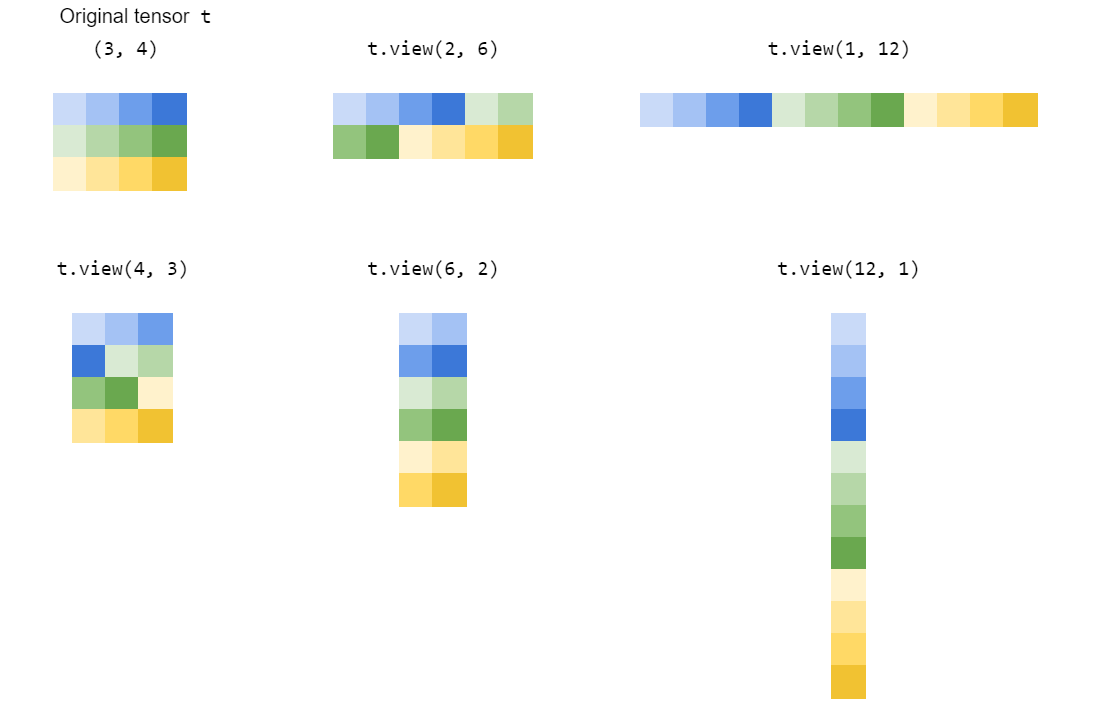

In [ ]:
stacked_threes.shape, stacked_sevens.shape

In [ ]:
#concatination
train_x=torch.cat([stacked_threes, stacked_sevens])
train_x.shape

In [ ]:
#reshapeing
train_x=train_x.view(-1, 28*28)
train_x.shape

In [ ]:
train_x=torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

### Har bir rasmlarning labellarini ham o'zgartirib ularni ham `train_x` datasetimizga moslab olamiz. `3` raqamiga tegishli rasmlarni "1" klass `7` raqamiga tegishli rasmlarni "0" klassga qayta labellab olamiz.

In [ ]:
train_y=tensor([1]*len(threes)+[0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

### PyTorch kutubxonasi indekslangan datasetni `(x, y)` ko'rinishida bo'lishini talab qiladi. Shuning uchun ham yuqoridagi datasetimizni, shu ko'rinishga `zip` funksiyasi yordamida keltirib olamiz

In [ ]:
dset=list(zip(train_x, train_y))
x, y=dset[0]
x.shape, y